In [5]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import inv

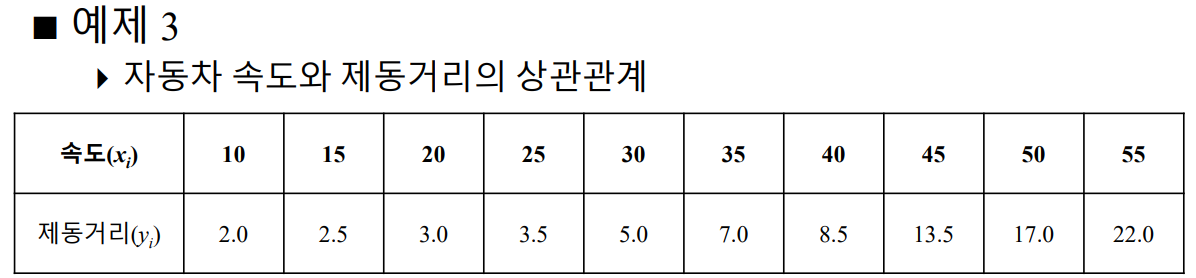

In [6]:
x=np.array([10, 15, 20, 25, 30, 35, 40, 45, 50, 55])
y=np.array([2.0, 2.5, 3.0, 3.5, 5.0, 7.0, 8.5, 13.5, 17.0, 22.0])

y_ave=np.sum(y)/len(y)
SST=np.sum((y-y_ave)**2)

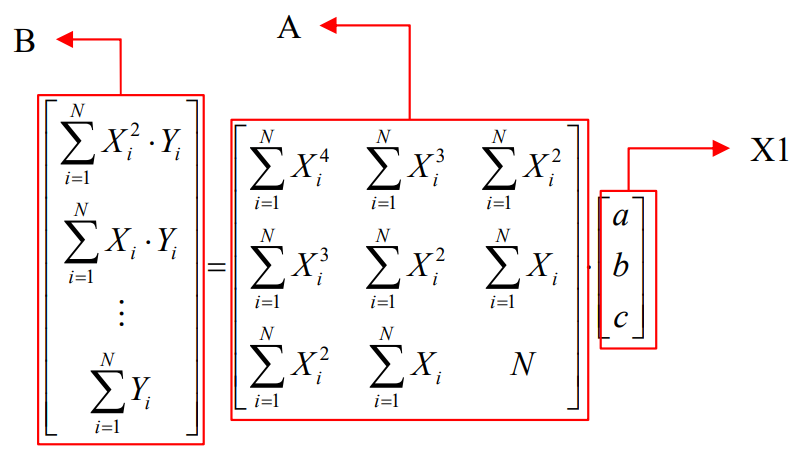

In [7]:
A = np.array([[np.sum(x**4), np.sum(x**3), np.sum(x**2)],
             [np.sum(x**3), np.sum(x**2), np.sum(x)],
             [np.sum(x**2), np.sum(x), len(x)]])

B = np.array([np.sum((x**2)*y), np.sum(x*y), np.sum(y)]).reshape(-1,1)

X1 = inv(A).dot(B)

y_approx_2rd=X1[0]*x**2 + X1[1]*x + X1[2]
SSR1=np.sum((y_approx_2rd-y_ave)**2)

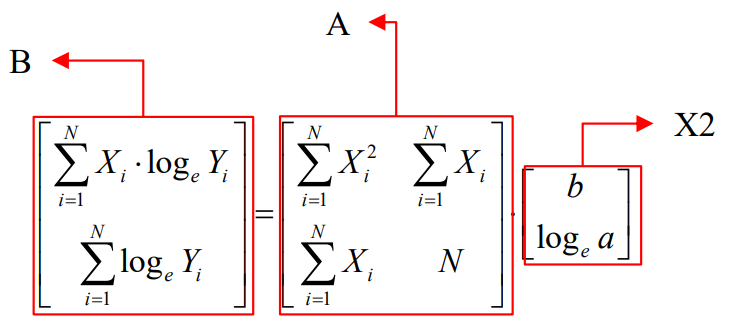

In [8]:
A = np.array([[np.sum(x**2), np.sum(x)],
              [np.sum(x), len(x)]])

B = np.array([np.sum(x*np.log(y)), np.sum(np.log(y))]).reshape(-1,1)

X2 = inv(A).dot(B)

y_approx_exp = np.exp(X2[1])*np.exp(X2[0]*x)
SSR2 = np.sum((y_approx_exp-y_ave)**2)

그래프를 그려 봅시다

Xi = 2.50113636, 3.83961034
R^2(1) = 0.99414802, R^2(2) = 0.89317406


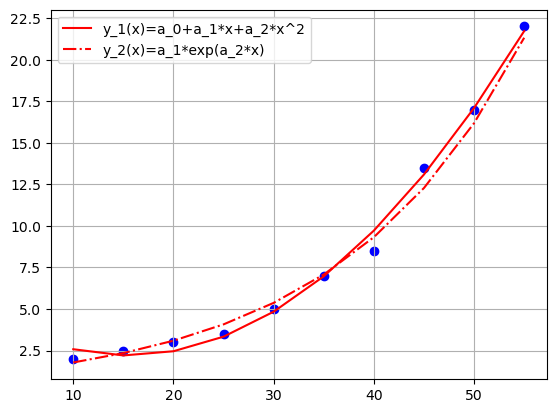

In [9]:
plt.scatter(x, y, color='b')
plt.plot(x, y_approx_2rd.flatten(), 'r-', label='y_1(x)=a_0+a_1*x+a_2*x^2')
plt.plot(x, y_approx_exp.flatten(), 'r-.', label='y_2(x)=a_1*exp(a_2*x)')
plt.legend(loc='upper left')
plt.grid(True)

print(f"Xi = {np.sum((y-y_approx_2rd)**2):.8f}, {np.sum((y-y_approx_exp)**2):.8f}")
print(f"R^2(1) = {SSR1/SST:.8f}, R^2(2) = {SSR2/SST:.8f}")